In [ ]:
# Get on chain data for CerebrumDAO from Etherscan
# offset for more data to 10,000 per call/page

In [11]:
import requests
import pandas as pd

API_KEY = '66QTUMWYCEKVCX8JJWCVPDHE8M6ZZTH7PX' #'YOUR_ETHERSCAN_API_KEY' get one free at Etherscan
TOKEN_ADDRESS = '0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b' # Cerebrum address on Etherscan

url = f'https://api.etherscan.io/api?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&page=1&offset=10000&sort=desc&apikey={API_KEY}'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['result'])
print(df.head())

# Convert dataframe and inspect
# Check if the request was successful
if data['status'] == '1':
    df = pd.DataFrame(data['result'])
    display(df.head())
else:
    print("Error:", data['message'])

  blockNumber   timeStamp                                               hash  \
0    22467971  1747062239  0x439899866219dc770987bae09d2a6559944411bb7824...   
1    22467581  1747057499  0x56f251d80998945a49a481180bd539568da7bd54916b...   
2    22467524  1747056815  0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...   
3    22467524  1747056815  0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...   
4    22467524  1747056815  0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...   

   nonce                                          blockHash  \
0  82251  0x3f2530815caba78723e6ab46117052f08c8be0f8b786...   
1   1111  0x6460e469858ea79d1d68ea3148be0ebaf036f8c775da...   
2    368  0xe858d73ac02cef044c67bc48c7a33518670fea708d7f...   
3    368  0xe858d73ac02cef044c67bc48c7a33518670fea708d7f...   
4    368  0xe858d73ac02cef044c67bc48c7a33518670fea708d7f...   

                                         from  \
0  0x4384273ccd97a503448ca46b3fd1da31689eb2ef   
1  0x4384273ccd97a503448ca46b3fd1da31689eb

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,22467971,1747062239,0x439899866219dc770987bae09d2a6559944411bb7824...,82251,0x3f2530815caba78723e6ab46117052f08c8be0f8b786...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,5601555141169041040386535,Cerebrum DAO Token,NEURON,18,86,310400,8399808086,206929,14123033,deprecated,291
1,22467581,1747057499,0x56f251d80998945a49a481180bd539568da7bd54916b...,1111,0x6460e469858ea79d1d68ea3148be0ebaf036f8c775da...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,6923235910960361844395731,Cerebrum DAO Token,NEURON,18,35,226482,14206755282,205893,2525621,deprecated,681
2,22467524,1747056815,0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...,368,0xe858d73ac02cef044c67bc48c7a33518670fea708d7f...,0x85cd07ea01423b1e937929b44e4ad8c40bbb5e71,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,1627604166503910000000000,Cerebrum DAO Token,NEURON,18,69,462326,9710315406,342622,10752438,deprecated,738
3,22467524,1747056815,0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...,368,0xe858d73ac02cef044c67bc48c7a33518670fea708d7f...,0x1231deb6f5749ef6ce6943a275a1d3e7486f4eae,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x85cd07ea01423b1e937929b44e4ad8c40bbb5e71,1627604166503910000000000,Cerebrum DAO Token,NEURON,18,69,462326,9710315406,342622,10752438,deprecated,738
4,22467524,1747056815,0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...,368,0xe858d73ac02cef044c67bc48c7a33518670fea708d7f...,0x6307119078556fc8ad77781dfc67df20d75fb4f9,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x1231deb6f5749ef6ce6943a275a1d3e7486f4eae,1627604166503910000000000,Cerebrum DAO Token,NEURON,18,69,462326,9710315406,342622,10752438,deprecated,738


In [ ]:
#Understand the Data. Each row is a token transfer

# Key columns:
#from: sender address
#to: recipient address
#value: amount transferred (in token’s smallest unit)
#timeStamp: when it happened (UNIX time)
#hash: transaction hash

In [12]:
# Convert timestamps and values

df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')
df['value'] = df['value'].astype(float) / (10 ** 18)  # Adjust decimals if token uses 18 decimals
display(df[['timeStamp', 'from', 'to', 'value', 'hash']].head())

/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_29307/1152284899.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')


,timeStamp,from,to,value,hash
0,2025-05-12 15:03:59,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,5.601555e+06,0x439899866219dc770987bae09d2a6559944411bb7824...
1,2025-05-12 13:44:59,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,6.923236e+06,0x56f251d80998945a49a481180bd539568da7bd54916b...
2,2025-05-12 13:33:35,0x85cd07ea01423b1e937929b44e4ad8c40bbb5e71,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,1.627604e+06,0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...
3,2025-05-12 13:33:35,0x1231deb6f5749ef6ce6943a275a1d3e7486f4eae,0x85cd07ea01423b1e937929b44e4ad8c40bbb5e71,1.627604e+06,0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...
4,2025-05-12 13:33:35,0x6307119078556fc8ad77781dfc67df20d75fb4f9,0x1231deb6f5749ef6ce6943a275a1d3e7486f4eae,1.627604e+06,0xba2d36b8e983118ab09aa342e8f6d86c812d4e197a48...


In [14]:
# SAVE DataFrame to CSV. Last 10000 transactions

df.to_csv('cerebrumdao_transfers.csv', index=False)

In [13]:
# Preliminary analysis of data
# Number of unique holders
unique_holders = df['to'].nunique()
print(f"Unique holders: {unique_holders}")

# Top 10 recipients
top_recipients = df['to'].value_counts().head(10)
print(top_recipients)

Unique holders: 1902
to
0x840faba6f38e28e1494f186990f0f17cb2c7bcac    1331
0x000000fee13a103a10d593b9ae06b3e05f2e7e1c     895
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad     859
0x9008d19f58aabd9ed0d60971565aa8510560ab41     394
0x74de5d4fcbf63e00296fd95d33236b9794016631     280
0x3154cf16ccdb4c6d922629664174b904d80f2c35     155
0xd9c6ee1547fd6d48f8872dd866473893bbe8a1ab     151
0x1111111254eeb25477b68fb85ed929f73a960582     122
0xca74f404e0c7bfa35b13b511097df966d5a65597     115
0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710      90
Name: count, dtype: int64


/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_29307/2091711414.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transfers_per_month = df.resample('M').size()


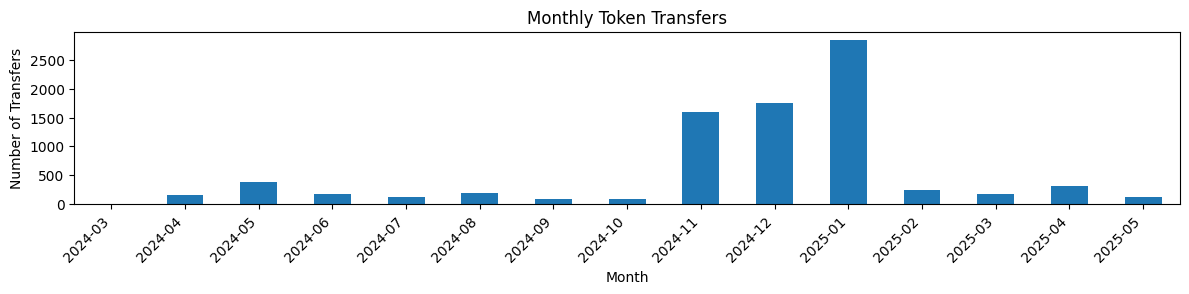

In [16]:
# Group by month and count transfers
transfers_per_month = df.resample('M').size()

fig, ax = plt.subplots(figsize=(12, 4))
transfers_per_month.plot(kind='bar', ax=ax)

plt.title('Monthly Token Transfers')
plt.xlabel('Month')
plt.ylabel('Number of Transfers')
plt.tight_layout()

# Format x-axis to show only year and month
ax.set_xticklabels([d.strftime('%Y-%m') for d in transfers_per_month.index], rotation=45, ha='right')

plt.show()